## Imports 

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

## Dataset

In [134]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Nettoyer le dataset

In [135]:
# drop columns City Name
pumpkins = pumpkins.drop(['City Name', 'Type', 'Package', 'Unit of Sale', 'Sub Variety', 'Grade', 'Mostly Low', 'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color', 'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'], axis=1)


In [136]:
pumpkins.head()

,Variety,Date,Low Price,High Price
0,NaN,4/29/17,270.0,280.0
1,NaN,5/6/17,270.0,280.0
2,HOWDEN TYPE,9/24/16,160.0,160.0
3,HOWDEN TYPE,9/24/16,160.0,160.0
4,HOWDEN TYPE,11/5/16,90.0,100.0


## Convertir la date en format 365

In [137]:
# show the date column
pumpkins['Date']
#create a new column called date_daily
pumpkins['date_daily'] = pd.to_datetime(pumpkins['Date'])
#show the new column
pumpkins['date_daily']
#transform data from date_daily to 365 days date format
pumpkins['date_daily'] = pumpkins['date_daily'].dt.dayofyear
#show date_daily and the date column
pumpkins[['date_daily', 'Date']]


,date_daily,Date
0,119,4/29/17
1,126,5/6/17
2,268,9/24/16
3,268,9/24/16
4,310,11/5/16
...,...,...
1752,274,9/30/16
1753,270,9/26/16
1754,271,9/27/16
1755,272,9/28/16


## Faire la moyenne des prix

In [138]:
#create a new column called average_price
pumpkins['average_price'] = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
pumpkins[['High Price', 'Low Price', 'average_price']]

,High Price,Low Price,average_price
0,280.00,270.00,275.00
1,280.00,270.00,275.00
2,160.00,160.00,160.00
3,160.00,160.00,160.00
4,100.00,90.00,95.00
...,...,...,...
1752,14.75,14.75,14.75
1753,275.00,275.00,275.00
1754,275.00,275.00,275.00
1755,275.00,275.00,275.00


### Trier par variétés

In [139]:
pumpkins.shape

(1757, 6)

In [140]:
# show variety different values and how many times they appear
pumpkins['Variety'].value_counts()

# delete all rows with variety value 'Other'
pumpkins = pumpkins[pumpkins['Variety'] != 'Other']

# delete all rows with no value in variety column
pumpkins = pumpkins[pumpkins['Variety'].notna()]

# delete all row on variety column with value 'No Variety'
pumpkins = pumpkins[pumpkins['Variety'] != 'No Variety']

# delete all rows with the value 'CINDERELLA', 'BIG MACK TYPE', 'MIXED HEIRLOOM VARIETIES', 'HOWDEN WHITE TYPE', 'KNUCKLE HEAD', 'BLUE TYPE' in variety column
pumpkins = pumpkins[pumpkins['Variety'] != 'CINDERELLA']
pumpkins = pumpkins[pumpkins['Variety'] != 'BIG MACK TYPE']
pumpkins = pumpkins[pumpkins['Variety'] != 'MIXED HEIRLOOM VARIETIES']
pumpkins = pumpkins[pumpkins['Variety'] != 'HOWDEN WHITE TYPE']
pumpkins = pumpkins[pumpkins['Variety'] != 'KNUCKLE HEAD']
pumpkins = pumpkins[pumpkins['Variety'] != 'BLUE TYPE']

# how many rows are left
pumpkins.shape


(1452, 6)

In [141]:
pumpkins['Variety'].value_counts()

HOWDEN TYPE    542
PIE TYPE       468
MINIATURE      310
FAIRYTALE      132
Name: Variety, dtype: int64

Mettre les valeurs en numérique

In [142]:
# one hot encoding variety column

pumpkins.head()


,Variety,Date,Low Price,High Price,date_daily,average_price
2,HOWDEN TYPE,9/24/16,160.0,160.0,268,160.0
3,HOWDEN TYPE,9/24/16,160.0,160.0,268,160.0
4,HOWDEN TYPE,11/5/16,90.0,100.0,310,95.0
5,HOWDEN TYPE,11/12/16,90.0,100.0,317,95.0
6,HOWDEN TYPE,9/24/16,160.0,170.0,268,165.0


## Séparer les valeurs

In [143]:

X = pd.get_dummies(pumpkins['Variety']).join(pumpkins['date_daily'])
y = pumpkins['average_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lin_reg = LinearRegression().fit(X_train,y_train)


## Calculs des indicateurs

In [144]:
pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 65.6 (56.1%)
Model determination:  0.354802836254961


## Créer le graphique

In [146]:
print(X, y)

      FAIRYTALE  HOWDEN TYPE  MINIATURE  PIE TYPE  date_daily
2             0            1          0         0         268
3             0            1          0         0         268
4             0            1          0         0         310
5             0            1          0         0         317
6             0            1          0         0         268
...         ...          ...        ...       ...         ...
1752          0            0          1         0         274
1753          0            0          1         0         270
1754          0            0          1         0         271
1755          0            0          1         0         272
1756          0            0          1         0         273

[1452 rows x 5 columns] 2       160.00
3       160.00
4        95.00
5        95.00
6       165.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Name: average_price, Length: 1452, dtype: float64


ValueError: x and y must be the same size

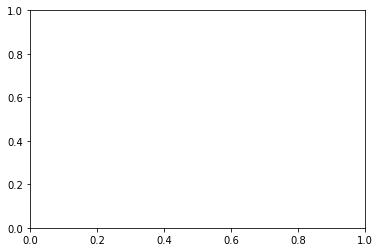

In [145]:
plt.scatter(X_train,y_train, s = 5) #Training data
plt.scatter(X_test,y_test, color = "orange", s = 5) #Test data
plt.plot(X_test, pred) #Regression line
plt.xlabel("day of year")
plt.ylabel("price")
plt.show()